# **Analysis On The ML Dataset**


# **Start pySpark:**
This code was given to us. This code starts pySpark:

In [ ]:
# We added this code since pySpark because pyspark imports was giving us an error that pyspark modules cannot
# resolved
!pip install basemap
!pip install pyspark

# This is the code that was given to us
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
!tar -xvf spark-3.3.3-bin-hadoop3.tgz
!pip install findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

sc = spark.sparkContext

  Using cached pyspark-3.5.0.tar.gz (316.9 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=68fd81a74a509a3314c1b086bb179bcd89703bf3f5a3e1ae30a2a2311d858fa9
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
--2023-12-14 17:55:38--  https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299426263 (286M) [application/x-gzip]
Saving to: ‘spark-3.3.3-bin-hadoop3.tgz’

spark-3.3.3-bin-had 100%[===================>] 285.55M   190MB/s    in 1.5s    

2023-12-14 17:55:48 (190 MB/s) - ‘spark-3.3.3-bin-hadoop3.tgz’ saved [299426263/299426263]

spark-3.3.3-bin-hadoop3/
spark-3.3.3-bin-hadoop3/LIC

# **First find NULL Values and values where latitude and longitude = 0**
We will first remove all years that have a value of 0 and than determine all the null values

In [ ]:
import pandas as pd

fileName = '/content/Machine_Learning_Dataset.csv'

# Read in data and visualize null values:
df = pd.read_csv(fileName)
print(df.isnull().sum())


artist_familiarity              4
artist_hotttnesss               0
artist_latitude              6257
artist_longitude             6257
artist_name                     0
song_hotttnesss              4351
audio_md5                       0
duration                        0
end_of_fade_in                  0
key                             0
key_confidence                  0
loudness                        0
start_of_fade_out               0
tempo                           0
time_signature                  0
time_signature_confidence       0
year                            0
dtype: int64


In [ ]:
# Calculate the average values for the 'artist_familiarity', 'song_hotttnesss', 'tempo', and 'year' features:
fam_avg = df['artist_familiarity'].mean()
hot_avg = df['song_hotttnesss'].mean()
tempo_avg = df[df['tempo'] != 0]['tempo'].mean()      # Dont consider when tempo is zero for getting the average
year_avg = round(df[df['year'] != 0]['year'].mean())  # Dont consider when year is zero for getting the average

# Fill in missing 'artist_familiarity' and 'song_hotttnesss' with average column values:
df['artist_familiarity'].fillna(fam_avg, inplace = True)
df['song_hotttnesss'].fillna(hot_avg, inplace = True)

# Fill in 'value = 0' rows with the average 'tempo' and 'year' values:
df.loc[df['tempo'] == 0, 'tempo'] = tempo_avg
df.loc[df['year'] == 0, 'year'] = year_avg

# Visualize remaining null values after 'artist_familiarity' and 'song_hotttnesss' have been filled in:
print(df.isnull().sum())

df.describe()


artist_familiarity              0
artist_hotttnesss               0
artist_latitude              6257
artist_longitude             6257
artist_name                     0
song_hotttnesss                 0
audio_md5                       0
duration                        0
end_of_fade_in                  0
key                             0
key_confidence                  0
loudness                        0
start_of_fade_out               0
tempo                           0
time_signature                  0
time_signature_confidence       0
year                            0
dtype: int64


,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,song_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,start_of_fade_out,tempo,time_signature,time_signature_confidence,year
count,9999.000000,9999.000000,3742.000000,3742.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.565452,0.385550,37.157357,-63.933358,0.342822,238.454175,0.758692,5.275828,0.449560,-10.486195,229.921708,123.223902,3.564856,0.509946,1997.108611
std,0.160137,0.143654,15.598494,50.508223,0.185796,114.018492,1.868030,3.554160,0.274985,5.399802,112.072482,34.643792,1.266290,0.373427,7.995711
min,0.000000,0.000000,-41.280540,-162.436500,0.000000,1.044440,0.000000,0.000000,0.000000,-51.643000,1.044000,16.258000,0.000000,0.000000,1926.000000
25%,0.467624,0.325227,33.748310,-93.291560,0.319566,176.025670,0.000000,2.000000,0.225000,-13.163500,168.856000,97.070000,3.000000,0.097500,1997.000000
50%,0.563749,0.380728,38.997920,-80.237420,0.342822,223.059140,0.199000,5.000000,0.469000,-9.380000,213.879000,120.284000,4.000000,0.551000,1997.000000
75%,0.668020,0.453866,43.648560,-9.401020,0.405116,276.296690,0.421000,8.000000,0.659000,-6.533000,266.280500,144.014500,4.000000,0.864000,2000.000000
max,1.000000,1.082503,69.651020,174.767140,1.000000,1819.767710,43.119000,11.000000,1.000000,0.566000,1813.426000,262.828000,7.000000,1.000000,2010.000000


In [ ]:
# Remove rows where latitude and longitude are 0:
df = df[df['artist_latitude'] != 0]
df = df[df['artist_longitude'] != 0]

# Remove rows with Null values for latitude and longitude:
df = df.dropna()

# Visualize null values after they have been dropped for confirmation:
print(df.isnull().sum())

df.describe()


artist_familiarity           0
artist_hotttnesss            0
artist_latitude              0
artist_longitude             0
artist_name                  0
song_hotttnesss              0
audio_md5                    0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
year                         0
dtype: int64


,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,song_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,start_of_fade_out,tempo,time_signature,time_signature_confidence,year
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,0.579371,0.394165,37.157357,-63.933358,0.337879,235.750048,0.748245,5.249866,0.460477,-11.039343,227.235971,122.472527,3.498931,0.486665,1996.129343
std,0.139444,0.113942,15.598494,50.508223,0.185235,122.560203,1.877341,3.567555,0.277707,5.484051,120.614377,33.965126,1.323961,0.373256,9.469339
min,0.000000,0.000000,-41.280540,-162.436500,0.000000,1.044440,0.000000,0.000000,0.000000,-51.643000,1.044000,26.663000,1.000000,0.000000,1926.000000
25%,0.489738,0.341905,33.748310,-93.291560,0.270776,168.495870,0.000000,2.000000,0.240250,-13.940500,161.690500,96.801750,3.000000,0.050250,1997.000000
50%,0.577381,0.386290,38.997920,-80.237420,0.342822,214.086080,0.207000,5.000000,0.486500,-10.128000,206.239500,119.996500,4.000000,0.516500,1997.000000
75%,0.659945,0.446072,43.648560,-9.401020,0.393798,272.972610,0.421000,8.750000,0.672000,-6.923250,263.779750,142.820000,4.000000,0.827000,1999.000000
max,0.989939,0.908203,69.651020,174.767140,1.000000,1819.767710,36.490000,11.000000,1.000000,-1.031000,1813.426000,262.828000,7.000000,1.000000,2010.000000


# **Data Exploration - Visualize latitude and longitude distributions:**



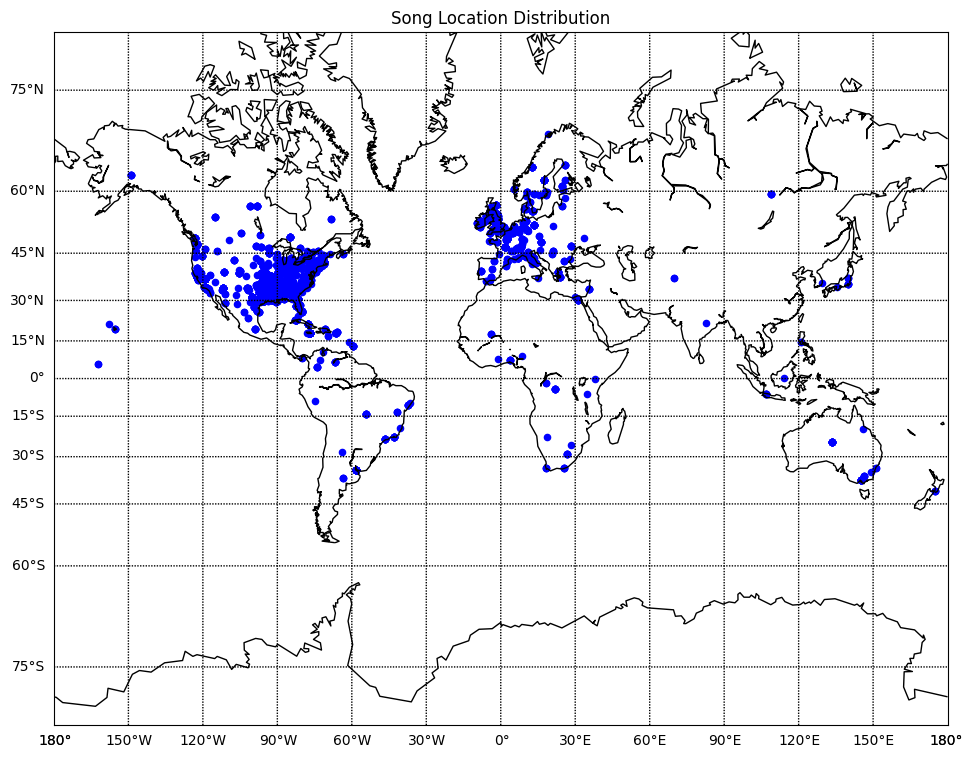

In [ ]:
# Import required modules for mapping lat-long:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create plot and basemap for plotting spatial distribution of songs:
plt.figure(figsize = (15,9))
bm = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
bm.drawcoastlines()
bm.drawparallels(range(-90, 91, 15), labels = [1, 0, 0, 0])
bm.drawmeridians(range(-180, 180, 30), labels = [0, 0, 0, 1])

# Grab latitudes and longitudes from dataframe:
longs = df['artist_longitude'].values
lats = df['artist_latitude'].values

# Convert from latitude and longitude into format used for plotting on Basemap:
x_coords, y_coords = bm(longs, lats)

# Plot points onto the map:
bm.scatter(x_coords, y_coords, s = 20, marker = 'o', color = 'blue', zorder = 1)

# Show the map:
plt.title('Song Location Distribution')
plt.show()

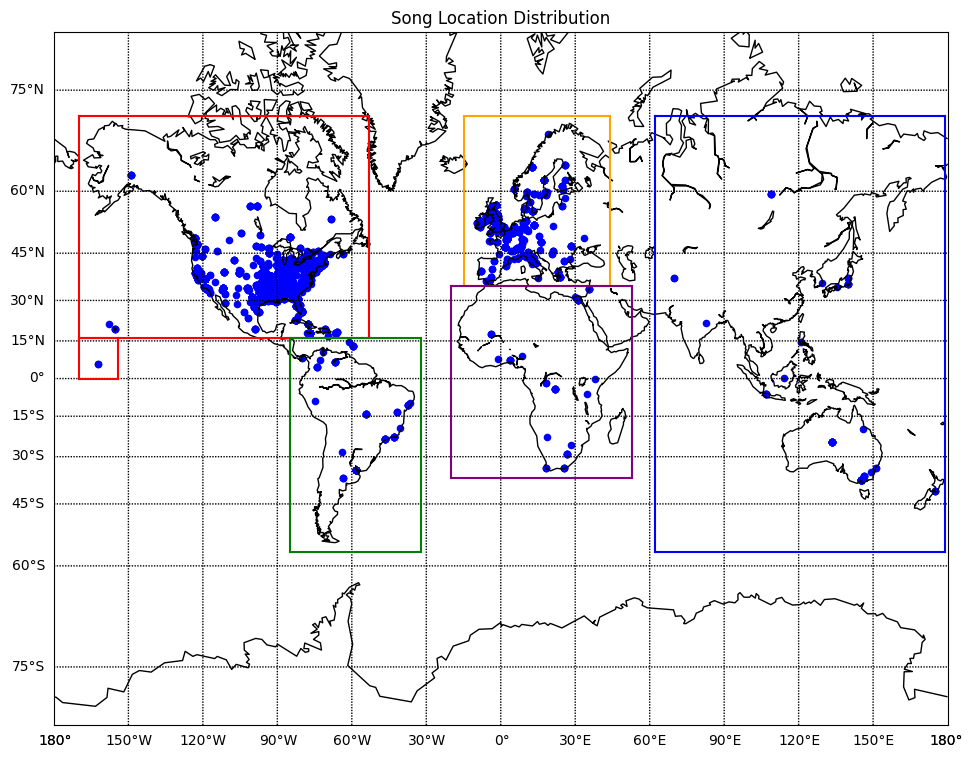

In [ ]:
# Create plot and basemap for plotting spatial distribution of songs:
plt.figure(figsize = (15,9))
bm = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
bm.drawcoastlines()
bm.drawparallels(range(-90, 91, 15), labels = [1, 0, 0, 0])
bm.drawmeridians(range(-180, 180, 30), labels = [0, 0, 0, 1])

# Plot points onto the map:
bm.scatter(x_coords, y_coords, s = 20, marker = 'o', color = 'blue', zorder = 1)

#---------------------------------------------------------------------------------------------------------------------
# Create first North America classification boundary limits:
north_a1_longs = [-170, -53]
north_a1_lats = [16, 72]
north_a1_x, north_a1_y = bm(north_a1_longs, north_a1_lats)

# Create second North America classification boundary limits:
north_a2_longs = [-170, -154]
north_a2_lats = [0, 16]
north_a2_x, north_a2_y = bm(north_a2_longs, north_a2_lats)

# Plot the 4 lines that define the first classification boundary for North America:
bm.plot([north_a1_x[0], north_a1_x[0]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[1], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a1_x[1], north_a1_x[1]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[0], north_a1_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the second classification boundary for North America:
bm.plot([north_a2_x[0], north_a2_x[0]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[1], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a2_x[1], north_a2_x[1]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[0], north_a2_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary


#---------------------------------------------------------------------------------------------------------------------
# Create South America classification boundary limit:
south_a_longs = [-85, -32]
south_a_lats = [-57, 16]
south_a_x, south_a_y = bm(south_a_longs, south_a_lats)

# Plot the 4 lines that define the classification boundary for South America:
bm.plot([south_a_x[0], south_a_x[0]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Left boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[1], south_a_y[1]], color = 'green', linewidth = 1.5)   # Top boundary
bm.plot([south_a_x[1], south_a_x[1]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Right boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[0], south_a_y[0]], color = 'green', linewidth = 1.5)   # Bottom boundary


#---------------------------------------------------------------------------------------------------------------------
# Create Europe classification boundary limit:
europe_longs = [-15, 44]
europe_lats = [35, 72]
europe_x, europe_y = bm(europe_longs, europe_lats)

# Plot the 4 lines that define the classification boundary for Europe:
bm.plot([europe_x[0], europe_x[0]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Left boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[1], europe_y[1]], color = 'orange', linewidth = 1.5)   # Top boundary
bm.plot([europe_x[1], europe_x[1]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Right boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[0], europe_y[0]], color = 'orange', linewidth = 1.5)   # Bottom boundary


#---------------------------------------------------------------------------------------------------------------------
# Create Africa classification boundary limit:
africa_longs = [-20, 53]
africa_lats = [-37, 35]
africa_x, africa_y = bm(africa_longs, africa_lats)

# Plot the 4 lines that define the classification boundary for Africa:
bm.plot([africa_x[0], africa_x[0]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Left boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[1], africa_y[1]], color = 'purple', linewidth = 1.5)   # Top boundary
bm.plot([africa_x[1], africa_x[1]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Right boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[0], africa_y[0]], color = 'purple', linewidth = 1.5)   # Bottom boundary


#---------------------------------------------------------------------------------------------------------------------
# Create Asia South Pacific classification boundary limit:
asia_longs = [62, 179]
asia_lats = [-57, 72]
asia_x, asia_y = bm(asia_longs, asia_lats)

# Plot the 4 lines that define the classification boundary for Asia South Pacific:
bm.plot([asia_x[0], asia_x[0]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Left boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[1], asia_y[1]], color = 'blue', linewidth = 1.5)   # Top boundary
bm.plot([asia_x[1], asia_x[1]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Right boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[0], asia_y[0]], color = 'blue', linewidth = 1.5)   # Bottom boundary

# Show the map:
plt.title('Song Location Distribution')
plt.show()

### Assigning points to clusters:

In [ ]:
# Define the cluster regions as encoded values:
regions = [0, 1, 2, 3, 4]

#---------------------------------------------------------------------------------------------------------------------------
# Create function to evaluate latitude and longitude if conditions and determine region each song (row) will be assigned to:
def assign_region(song_row):

  # Check for when song_row is within the first North America bounding box:
  if(song_row['artist_latitude'] > north_a1_lats[0]):
    if(song_row['artist_latitude'] < north_a1_lats[1]):
      if(song_row['artist_longitude'] > north_a1_longs[0]):
        if(song_row['artist_longitude'] < north_a1_longs[1]):
          return regions[0]   # North America

  # Check for when song_row is within the second North America bounding box:
  if(song_row['artist_latitude'] > north_a2_lats[0]):
    if(song_row['artist_latitude'] < north_a2_lats[1]):
      if(song_row['artist_longitude'] > north_a2_longs[0]):
        if(song_row['artist_longitude'] < north_a2_longs[1]):
          return regions[0]   # North America

  # Check for when song_row is within the South America bounding box:
  if(song_row['artist_latitude'] > south_a_lats[0]):
    if(song_row['artist_latitude'] < south_a_lats[1]):
      if(song_row['artist_longitude'] > south_a_longs[0]):
        if(song_row['artist_longitude'] < south_a_longs[1]):
          return regions[1]   # South America

  # Check for when song_row is within the Europe bounding box:
  if(song_row['artist_latitude'] > europe_lats[0]):
    if(song_row['artist_latitude'] < europe_lats[1]):
      if(song_row['artist_longitude'] > europe_longs[0]):
        if(song_row['artist_longitude'] < europe_longs[1]):
          return regions[2]   # Europe

  # Check for when song_row is within the Africa bounding box:
  if(song_row['artist_latitude'] > africa_lats[0]):
    if(song_row['artist_latitude'] < africa_lats[1]):
      if(song_row['artist_longitude'] > africa_longs[0]):
        if(song_row['artist_longitude'] < africa_longs[1]):
          return regions[3]   # Africa

  # Check for when song_row is within the Asia South Pacific bounding box:
  if(song_row['artist_latitude'] > asia_lats[0]):
    if(song_row['artist_latitude'] < asia_lats[1]):
      if(song_row['artist_longitude'] > asia_longs[0]):
        if(song_row['artist_longitude'] < asia_longs[1]):
          return regions[4]   # Asia South Pacific

  # For when no value matches any of the predefined region boundaries: (Hopefully this never happens with the dataset being used)
  return None
#---------------------------------------------------------------------------------------------------------------------------

# Apply the 'assign_region' function to each row:
df['song_region'] = df.apply(assign_region, axis = 1)

df.describe()


,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,song_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,song_region
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,0.579371,0.394165,37.157357,-63.933358,0.337879,235.750048,0.748245,5.249866,0.460477,-11.039343,227.235971,122.472527,3.498931,0.486665,1996.129343,0.574826
std,0.139444,0.113942,15.598494,50.508223,0.185235,122.560203,1.877341,3.567555,0.277707,5.484051,120.614377,33.965126,1.323961,0.373256,9.469339,0.987295
min,0.000000,0.000000,-41.280540,-162.436500,0.000000,1.044440,0.000000,0.000000,0.000000,-51.643000,1.044000,26.663000,1.000000,0.000000,1926.000000,0.000000
25%,0.489738,0.341905,33.748310,-93.291560,0.270776,168.495870,0.000000,2.000000,0.240250,-13.940500,161.690500,96.801750,3.000000,0.050250,1997.000000,0.000000
50%,0.577381,0.386290,38.997920,-80.237420,0.342822,214.086080,0.207000,5.000000,0.486500,-10.128000,206.239500,119.996500,4.000000,0.516500,1997.000000,0.000000
75%,0.659945,0.446072,43.648560,-9.401020,0.393798,272.972610,0.421000,8.750000,0.672000,-6.923250,263.779750,142.820000,4.000000,0.827000,1999.000000,2.000000
max,0.989939,0.908203,69.651020,174.767140,1.000000,1819.767710,36.490000,11.000000,1.000000,-1.031000,1813.426000,262.828000,7.000000,1.000000,2010.000000,4.000000


### Mapping Points Showing Classifications

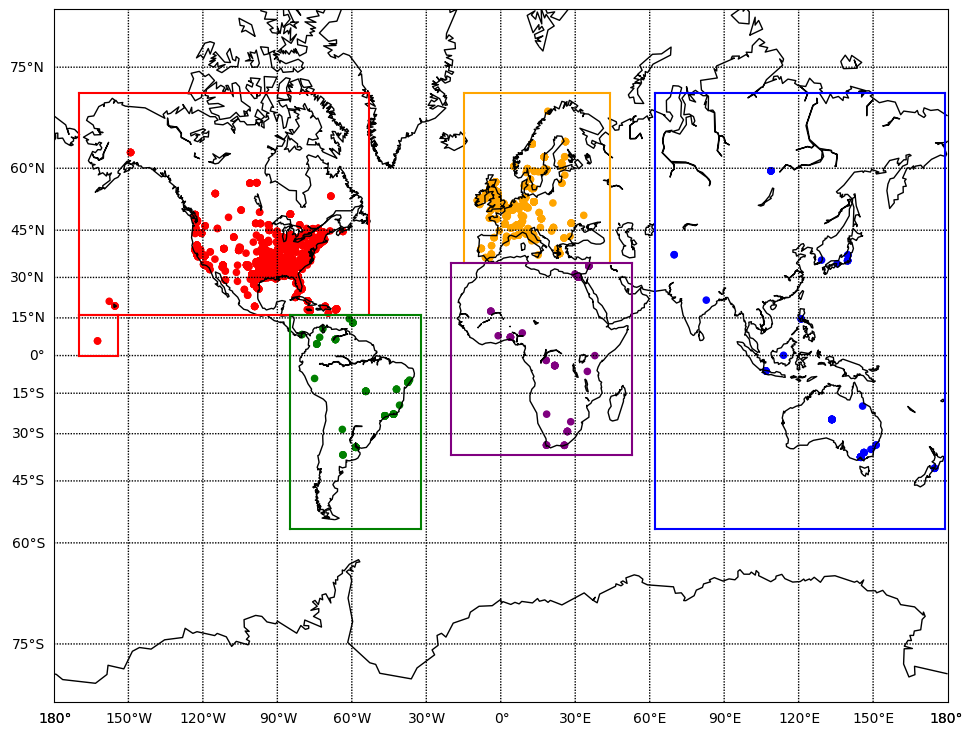

In [ ]:
# Import necessary library for color mapping:
from matplotlib.colors import ListedColormap

# Create plot and basemap for plotting spatial distribution of songs:
plt.figure(figsize = (15,9))
bm = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
bm.drawcoastlines()
bm.drawparallels(range(-90, 91, 15), labels = [1, 0, 0, 0])
bm.drawmeridians(range(-180, 180, 30), labels = [0, 0, 0, 1])

# Define the color-region scheme to be used and make a colormap: (consistent with previous mapping plots)
colors = ['red', 'green', 'orange', 'purple', 'blue']
regions = [0, 1, 2, 3, 4]
c_map = ListedColormap(colors[:len(regions)])

# Plot the region-categorized points onto the map:
bm.scatter(x_coords, y_coords, s = 20, marker = 'o', c = df['song_region'], cmap = c_map, zorder = 1)

# Plot the 4 lines that define the first classification boundary for North America:
bm.plot([north_a1_x[0], north_a1_x[0]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[1], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a1_x[1], north_a1_x[1]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[0], north_a1_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the second classification boundary for North America:
bm.plot([north_a2_x[0], north_a2_x[0]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[1], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a2_x[1], north_a2_x[1]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[0], north_a2_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for South America:
bm.plot([south_a_x[0], south_a_x[0]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Left boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[1], south_a_y[1]], color = 'green', linewidth = 1.5)   # Top boundary
bm.plot([south_a_x[1], south_a_x[1]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Right boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[0], south_a_y[0]], color = 'green', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Europe:
bm.plot([europe_x[0], europe_x[0]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Left boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[1], europe_y[1]], color = 'orange', linewidth = 1.5)   # Top boundary
bm.plot([europe_x[1], europe_x[1]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Right boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[0], europe_y[0]], color = 'orange', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Africa:
bm.plot([africa_x[0], africa_x[0]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Left boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[1], africa_y[1]], color = 'purple', linewidth = 1.5)   # Top boundary
bm.plot([africa_x[1], africa_x[1]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Right boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[0], africa_y[0]], color = 'purple', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Asia South Pacific:
bm.plot([asia_x[0], asia_x[0]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Left boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[1], asia_y[1]], color = 'blue', linewidth = 1.5)   # Top boundary
bm.plot([asia_x[1], asia_x[1]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Right boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[0], asia_y[0]], color = 'blue', linewidth = 1.5)   # Bottom boundary

# Show the map:
plt.title('Song Location Distribution')
plt.show()


<Axes: >

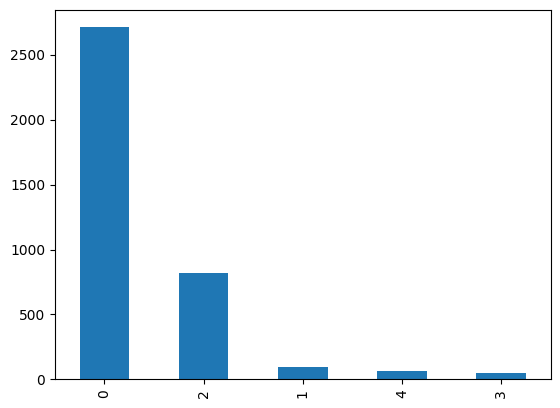

In [ ]:
# Visualize the distribution of songs in the 5 defined regions:
df['song_region'].value_counts().plot(kind = 'bar')

### Start Working with Spark:

In [ ]:
# Convert from our pandas dataframe to a spark dataframe:
df_spark = spark.createDataFrame(df)

# Visualize spark dataframe to ensure proper loading:
df_spark.show()


/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------+
|artist_familiarity| artist_hotttnesss|artist_latitude|artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|song_region|
+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------+
|0.4736241237475465|0.3645865754085436|       32.58507|       -89.87374|       b'Joe Turner'|0.34282170049924016|b'78cfa0ef2c39ec9...|198.50404|          0.29|  5|         0.166| -16.2

# **One Hot encoding to finish up our preprocessing in Spark:**

In [ ]:
# Import the dependencies for pySpark:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

# Determine the categoriacal variables:
artist_name_col = 'artist_name'
audio_md5_col = 'audio_md5'

# Convert them into a String Index:
indexer1 = StringIndexer(inputCol = artist_name_col, outputCol = 'artist_name_index')
indexer2 = StringIndexer(inputCol = audio_md5_col, outputCol = 'audio_md5_index')

# User One-Hot-Encoding on the String Index:
one_hot_encoder1 = OneHotEncoder(inputCol = 'artist_name_index', outputCol = 'artist_name_one_hot')
one_hot_encoder2 = OneHotEncoder(inputCol = 'audio_md5_index' , outputCol = 'audio_md5_one_hot')

# Import Pipeline to apply the change to the spark datafreame:
from pyspark.ml import Pipeline

# Create the pipeline:
pipe = Pipeline(stages = [indexer1, indexer2, one_hot_encoder1, one_hot_encoder2])

# Apply the pipeline:
df_spark_finished = pipe.fit(df_spark).transform(df_spark)

# Show the results:
df_spark_finished.show()

+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------+-----------------+---------------+-------------------+-------------------+
|artist_familiarity| artist_hotttnesss|artist_latitude|artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|song_region|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|
+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------+-----------------+---------------+---

# **Convert Data frame into proper target vector and feature vector:**



In [ ]:
# Load the dependencies:
from pyspark.ml.feature import VectorAssembler

# Determine our target vector:
target_vector = 'song_region'

# Determine our numerical features: (remove latitude and longitude from features):
numeric_feature_columns = ['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'duration',
                            'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'year']

# Determine our One-Hot-Encoded features:
one_hot_encoded_columns = ['artist_name_one_hot', 'audio_md5_one_hot']

# Combine all our features:
all_feature_columns = numeric_feature_columns + one_hot_encoded_columns

# Create a vector for our features, including the target variable:
feature_vector = VectorAssembler(inputCols=all_feature_columns, outputCol='feature_vector')

# Apply the vector to our data frame:
df_ML_complete = feature_vector.transform(df_spark_finished)

# Split our data - 80% for training and 20% for testing:
train, test = df_ML_complete.randomSplit([0.8, 0.2], seed=42)

# Show our final dataframe:
df_ML_complete.show()

+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-----------+-----------------+---------------+-------------------+-------------------+--------------------+
|artist_familiarity| artist_hotttnesss|artist_latitude|artist_longitude|         artist_name|    song_hotttnesss|           audio_md5| duration|end_of_fade_in|key|key_confidence|loudness|start_of_fade_out|  tempo|time_signature|time_signature_confidence|year|song_region|artist_name_index|audio_md5_index|artist_name_one_hot|  audio_md5_one_hot|      feature_vector|
+------------------+------------------+---------------+----------------+--------------------+-------------------+--------------------+---------+--------------+---+--------------+--------+-----------------+-------+--------------+-------------------------+----+-------

# **Use Linear SVC Model to Predict 'song_region':**

In [ ]:
# Import the dependencies:
from pyspark.ml.classification import OneVsRest, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Loop through these regularization parameters:
#max_iters = [100, 200]                         # for 'maxIter'
reg_params = [0.01, 0.1, 1.0, 10, 100]          # for 'regParam'

# Create the linearSVC model using OneVsRest approach:
#linearSVC = LinearSVC(featuresCol = 'feature_vector', labelCol = target_vector, maxIter = 200)
linearSVC = LinearSVC(maxIter = 200)
oneVrest = OneVsRest(classifier = linearSVC, featuresCol = 'feature_vector', labelCol = target_vector)

# Set up the accuracy and f1 metrics as an evaluator objects:
SVC_accuracy_evaluator = MulticlassClassificationEvaluator(labelCol = 'song_region', predictionCol = 'prediction', metricName = 'accuracy')
SVC_f1_evaluator = MulticlassClassificationEvaluator(labelCol = 'song_region', predictionCol = 'prediction', metricName = 'f1')

# Display header for model validation results:
print("--------------------------------------------")
print("LinearSVC Results Evaluated using OneVsRest:")
print("--------------------------------------------")

# Loop through all regularization values:
for reg in reg_params:

    # set the current regularization value:
    linearSVC.setRegParam(reg)

    # fit the model:
    linearSVCModel = oneVrest.fit(train)

    # Make train and test predictions:
    currSVC_train_pred = linearSVCModel.transform(train)
    currSVC_test_pred = linearSVCModel.transform(test)

    # Evaluate the current model results:
    currSVC_train_accuracy = SVC_accuracy_evaluator.evaluate(currSVC_train_pred)
    currSVC_train_f1 = SVC_f1_evaluator.evaluate(currSVC_train_pred)

    currSVC_test_accuracy = SVC_accuracy_evaluator.evaluate(currSVC_test_pred)
    currSVC_test_f1 = SVC_f1_evaluator.evaluate(currSVC_test_pred)

    # Print current model results to the console:
    print(f"Regularization value used: {reg}\n")
    print(f"Accuracy on training data: {currSVC_train_accuracy}")
    print(f"F1 score on training data: {currSVC_train_f1}\n")
    print(f"Accuracy on testing data:  {currSVC_test_accuracy}")
    print(f"F1 score on testing data:  {currSVC_test_f1}")
    print("---------------------")

--------------------------------------------
LinearSVC Results Evaluated using OneVsRest:
--------------------------------------------
Regularization value used: 0.01

Accuracy on training data: 1.0
F1 score on training data: 1.0

Accuracy on testing data:  0.8975468975468975
F1 score on testing data:  0.876920570342889
---------------------
Regularization value used: 0.1

Accuracy on training data: 1.0
F1 score on training data: 1.0

Accuracy on testing data:  0.924963924963925
F1 score on testing data:  0.9216766126756394
---------------------
Regularization value used: 1.0

Accuracy on training data: 1.0
F1 score on training data: 1.0

Accuracy on testing data:  0.924963924963925
F1 score on testing data:  0.9216766126756394
---------------------
Regularization value used: 10

Accuracy on training data: 0.7330272220400131
F1 score on training data: 0.6201044062299127

Accuracy on testing data:  0.6854256854256854
F1 score on testing data:  0.5574952064678091
---------------------
Re

In [ ]:
# Run the model with the best results to visualize predictions:
oneVrest_best = OneVsRest(classifier = LinearSVC(maxIter = 200, regParam = 0.1), featuresCol = 'feature_vector', labelCol = target_vector)

# fit the model:
linearSVCModel_best = oneVrest_best.fit(train)

# Make train and test predictions:
best_SVC_train_pred = linearSVCModel_best.transform(train)
best_SVC_test_pred = linearSVCModel_best.transform(test)


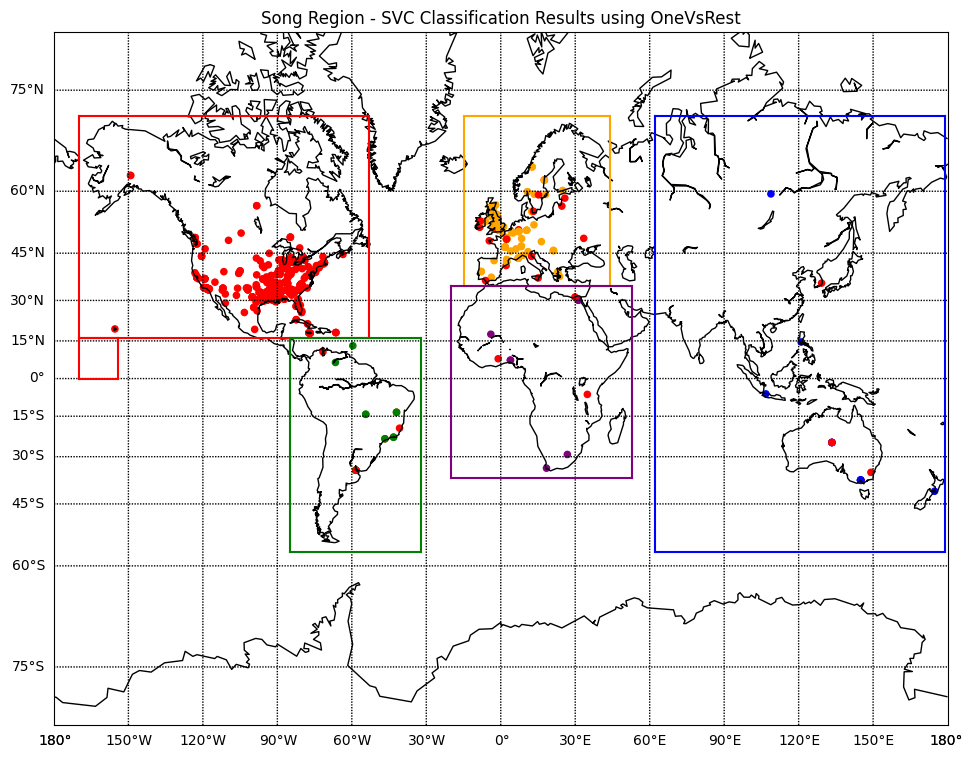

In [ ]:
# Convert 'test_predictions' into Pandas dataframe:
pd_test_predictions = best_SVC_test_pred.toPandas()

# Grab latitudes and longitudes from results dataframe:
best_longs = pd_test_predictions['artist_longitude'].values
best_lats = pd_test_predictions['artist_latitude'].values

# Convert from latitude and longitude into format used for plotting on Basemap:
best_x_coords, best_y_coords = bm(best_longs, best_lats)

# Create plot and basemap for plotting spatial distribution of songs:
plt.figure(figsize = (15,9))
bm = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
bm.drawcoastlines()
bm.drawparallels(range(-90, 91, 15), labels = [1, 0, 0, 0])
bm.drawmeridians(range(-180, 180, 30), labels = [0, 0, 0, 1])

# Plot the region-categorized points onto the map:
bm.scatter(best_x_coords, best_y_coords, s = 20, marker = 'o', c = pd_test_predictions['prediction'], cmap = c_map, zorder = 1)

# Plot the 4 lines that define the first classification boundary for North America:
bm.plot([north_a1_x[0], north_a1_x[0]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[1], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a1_x[1], north_a1_x[1]], [north_a1_y[0], north_a1_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a1_x[0], north_a1_x[1]], [north_a1_y[0], north_a1_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the second classification boundary for North America:
bm.plot([north_a2_x[0], north_a2_x[0]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Left boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[1], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Top boundary
bm.plot([north_a2_x[1], north_a2_x[1]], [north_a2_y[0], north_a2_y[1]], color = 'red', linewidth = 1.5)   # Right boundary
bm.plot([north_a2_x[0], north_a2_x[1]], [north_a2_y[0], north_a2_y[0]], color = 'red', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for South America:
bm.plot([south_a_x[0], south_a_x[0]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Left boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[1], south_a_y[1]], color = 'green', linewidth = 1.5)   # Top boundary
bm.plot([south_a_x[1], south_a_x[1]], [south_a_y[0], south_a_y[1]], color = 'green', linewidth = 1.5)   # Right boundary
bm.plot([south_a_x[0], south_a_x[1]], [south_a_y[0], south_a_y[0]], color = 'green', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Europe:
bm.plot([europe_x[0], europe_x[0]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Left boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[1], europe_y[1]], color = 'orange', linewidth = 1.5)   # Top boundary
bm.plot([europe_x[1], europe_x[1]], [europe_y[0], europe_y[1]], color = 'orange', linewidth = 1.5)   # Right boundary
bm.plot([europe_x[0], europe_x[1]], [europe_y[0], europe_y[0]], color = 'orange', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Africa:
bm.plot([africa_x[0], africa_x[0]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Left boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[1], africa_y[1]], color = 'purple', linewidth = 1.5)   # Top boundary
bm.plot([africa_x[1], africa_x[1]], [africa_y[0], africa_y[1]], color = 'purple', linewidth = 1.5)   # Right boundary
bm.plot([africa_x[0], africa_x[1]], [africa_y[0], africa_y[0]], color = 'purple', linewidth = 1.5)   # Bottom boundary

# Plot the 4 lines that define the classification boundary for Asia South Pacific:
bm.plot([asia_x[0], asia_x[0]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Left boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[1], asia_y[1]], color = 'blue', linewidth = 1.5)   # Top boundary
bm.plot([asia_x[1], asia_x[1]], [asia_y[0], asia_y[1]], color = 'blue', linewidth = 1.5)   # Right boundary
bm.plot([asia_x[0], asia_x[1]], [asia_y[0], asia_y[0]], color = 'blue', linewidth = 1.5)   # Bottom boundary

# Show the map:
plt.title('Song Region - SVC Classification Results using OneVsRest')
plt.show()